<a href="https://colab.research.google.com/github/ParsaRahimzadeh/IML_CHW4/blob/main/Support_Vector_Machines_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A classification model using SVM for Salary Data
In this notebook, we will built a classification model using Support Vector Machines (SVM) to predict whether an individual's salary is above or below $50,000 based on various features such as age, occupation, and more. We will perform exploratory data analysis to gain insights into the data and preprocess it for modeling. Next, we will train an SVM model using the training data. We'll evaluate the model's performance on the testing data, fine-tune its hyperparameters and perform additional preprocessing to improve its accuracy. Overall, the goal of this notebook is to demonstrate how to build a classification model using SVM and how to optimize its performance.

## Section 1. Importing Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Section 2. Load Train and Test Dataset

In [ ]:
from google.colab import files
import io
# TODO: Load the 'SalaryData_Train.csv' file into a pandas dataframe called train_data
uploaded_Train = files.upload()
train_data = pd.read_csv(io.BytesIO(uploaded_Train['SalaryData_Train.csv']))

# TODO: Load the 'SalaryData_Test.csv' file into a pandas dataframe called test_data
uploaded_Test = files.upload()
test_data = pd.read_csv(io.BytesIO(uploaded_Test['SalaryData_Test.csv']))

# TODO: Display the first 5 or 10 rows of the train_data dataframe
train_data.head(5)

Saving SalaryData_Train.csv to SalaryData_Train.csv


Saving SalaryData_Test.csv to SalaryData_Test.csv


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Section 3. EDA

In [ ]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()
# TODO: Print the shape of the train_data dataframe
print("train_data:",train_data_copy.shape)
# TODO: Print the shape of the test_data dataframe
print("test_data:",test_data_copy.shape)
print("================================================")
# TODO: Print the information about the train_data dataframe
train_data_copy.info()
print("================================================")
# TODO Display the summary statistics of the train_data dataframe
print(train_data_copy.describe())
print("================================================")
# TODO: Print the number of NaN values in each column of the train_data dataframe
Dict = {}
for col in train_data.columns:
  count_nan = train_data[col].isna().sum()
  Dict[col] = count_nan
print(Dict)

# TODO: Replace any NaN values in the train_data dataframe with 0
train_data_copy = train_data_copy.fillna(0)


train_data: (30161, 14)
test_data: (15060, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000

## Data Visualization

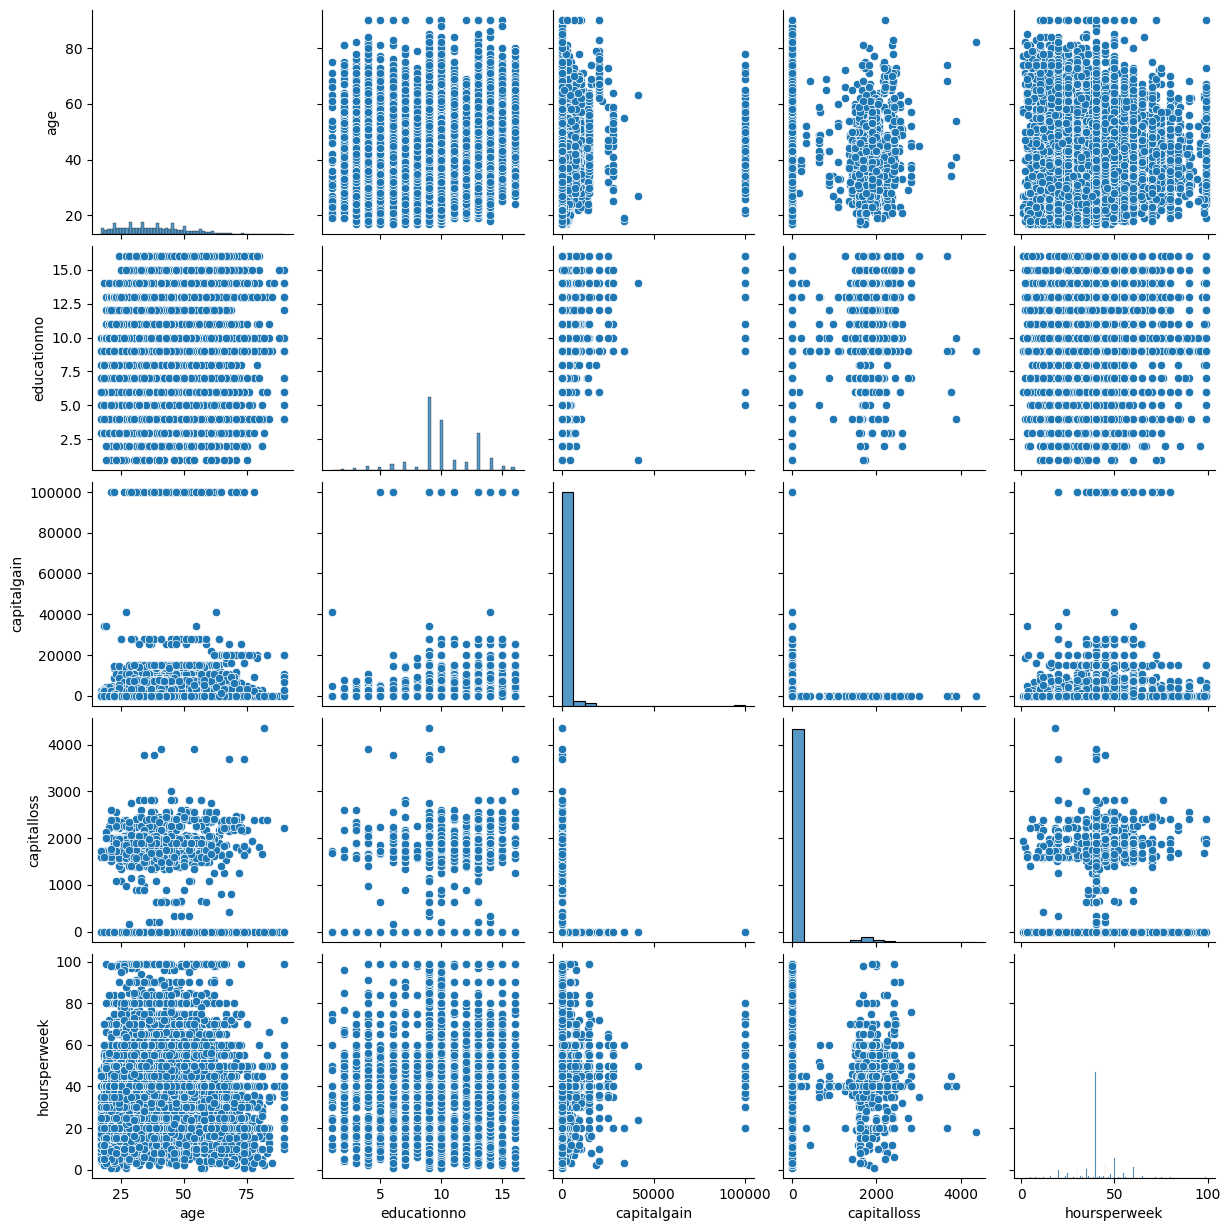

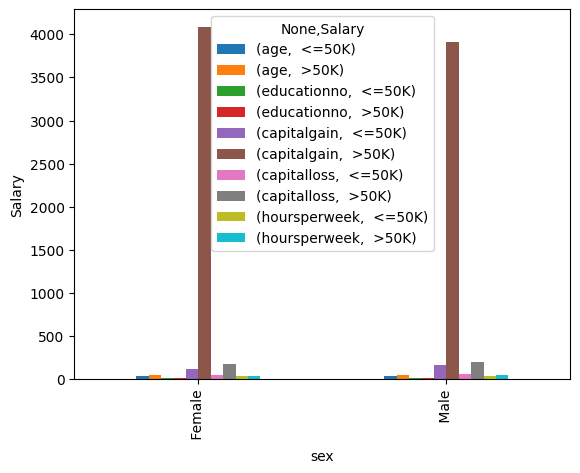

count of each salary group:  Axes(0.125,0.11;0.775x0.77)


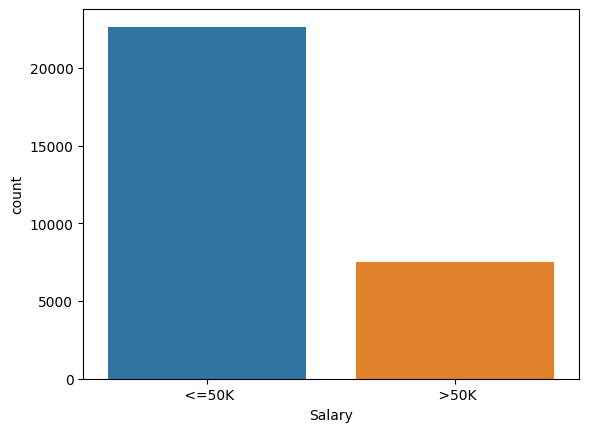

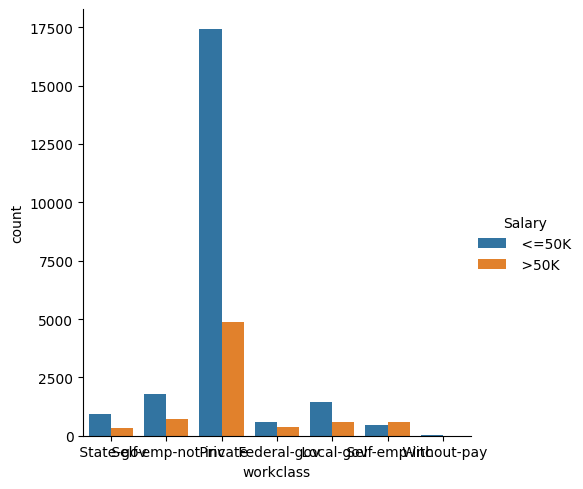

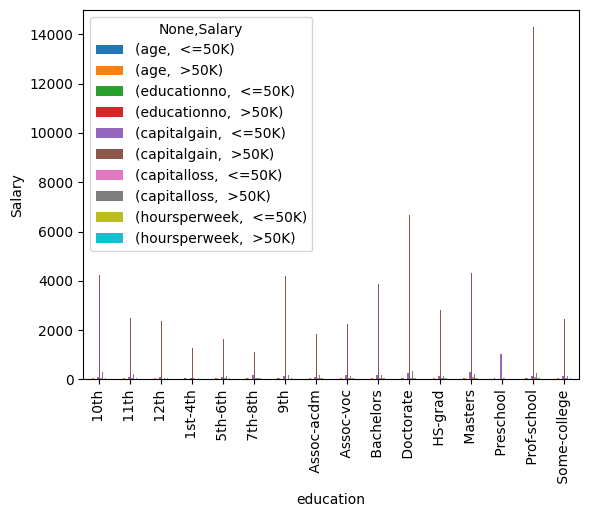

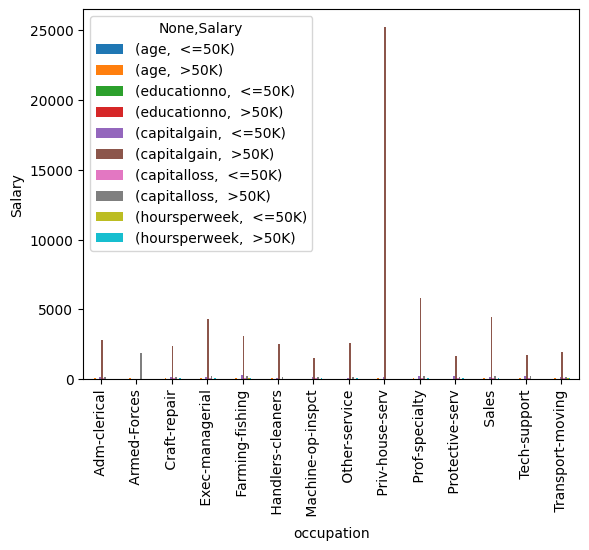

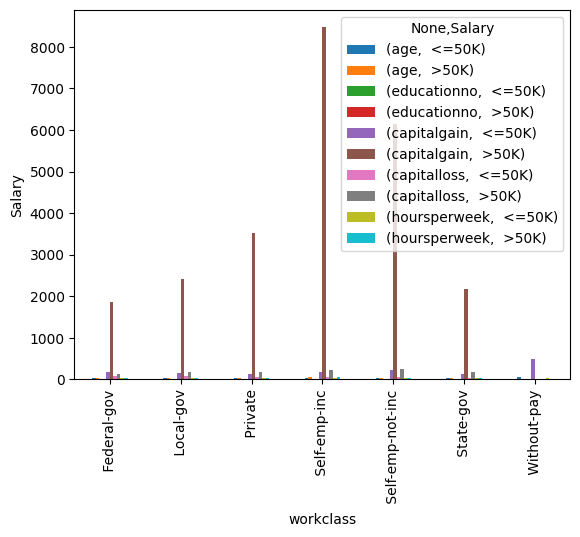

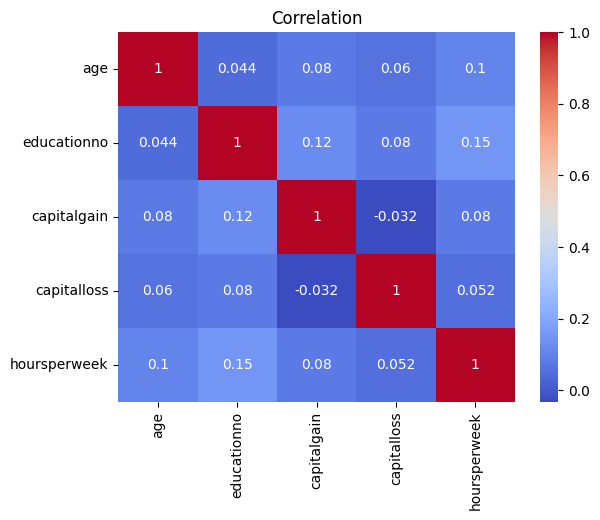

In [ ]:
# TODO: Display pairwise relationships between variables in the train_data dataframe
sns.pairplot(train_data)
# TODO: Plot the average count of males and females in each salary group using a bar plot
#-----------------------------------------------------------------------------------
# low_income_female = 0
# high_income_female = 0
# low_income_male = 0
# high_income_male = 0
# for ind in train_data_copy.index:
#     salary = train_data_copy['Salary'][ind]
#     if salary[1] == '<': # <=50K
#       if train_data_copy['sex'][ind].strip() == 'Male':
#         low_income_male = low_income_male + 1
#       elif train_data_copy['sex'][ind].strip() == 'Female':
#         low_income_female = low_income_female + 1
#     elif salary[1] == '>': # >50k
#       if train_data_copy['sex'][ind].strip() == 'Male':
#         high_income_male = high_income_male + 1
#       elif train_data_copy['sex'][ind].strip() == 'Female':
#         high_income_female = high_income_female + 1
# Dict = {}
# Dict["Female <=50K"] = low_income_female
# Dict["Male <=50K"] = low_income_male
# Dict["Female >50K"] = high_income_female
# Dict["Male >50K"] = high_income_male
# types = list(Dict.keys())
# values = list(Dict.values())
# fig = plt.figure()
# plt.xlabel("Gender & Income")
# plt.ylabel("Number")
# plt.title("average count of males and females in each salary group")
# plt.bar(types, values, color ='green',width = 0.4)
# plt.show()
#---------------------------------------------------------------------
new_data = train_data_copy.groupby(['Salary', 'sex']).mean().reset_index()
pivoted_data = new_data.pivot(index='sex', columns='Salary')
pivoted_data.plot(kind='bar')
plt.ylabel('Salary')
plt.xlabel('sex')
plt.show()

# TODO: Plot the count of each salary group in the train_data dataframe using a countplot
print("count of each salary group: ",sns.countplot(x='Salary', data=train_data))
# TODO: Plot the count of each salary group in each workclass using a bar plot
sns.catplot(x='workclass', hue='Salary', kind='count', data=train_data)
# TODO: Plot the average count of each education level in each salary group using a bar plot
new_data = train_data_copy.groupby(['Salary', 'education']).mean().reset_index()
pivoted_data = new_data.pivot(index='education', columns='Salary')
pivoted_data.plot(kind='bar')
plt.ylabel('Salary')
plt.xlabel('education')
plt.show()
# TODO: Plot the average count of each occupation in each salary group using a bar plot
new_data = train_data_copy.groupby(['Salary', 'occupation']).mean().reset_index()
pivoted_data = new_data.pivot(index='occupation', columns='Salary')
pivoted_data.plot(kind='bar')
plt.ylabel('Salary')
plt.xlabel('occupation')
plt.show()
# TODO: Plot the average count of each workclass in each salary group using a bar plot
new_data = train_data_copy.groupby(['Salary', 'workclass']).mean().reset_index()
pivoted_data = new_data.pivot(index='workclass', columns='Salary')
pivoted_data.plot(kind='bar')
plt.ylabel('Salary')
plt.xlabel('workclass')
plt.show()
# TODO: Plot the correlation between variables in the train_data dataframe using a heatmap
correlation = train_data_copy.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

###  Outliers Detection

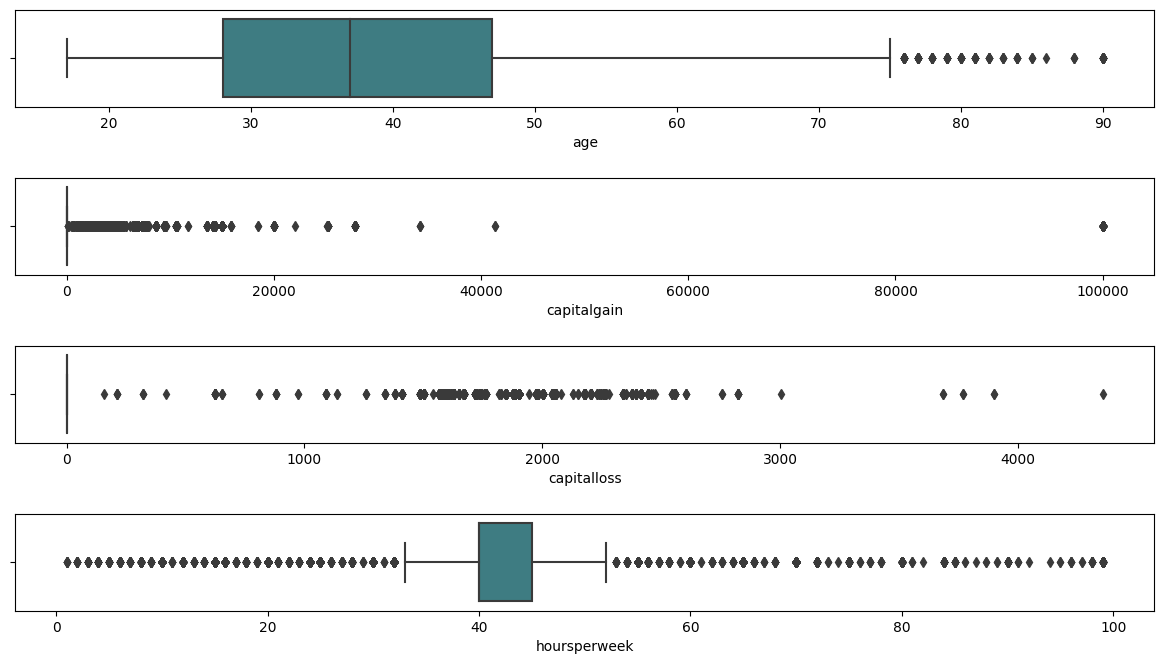

In [ ]:
outlier1 = train_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

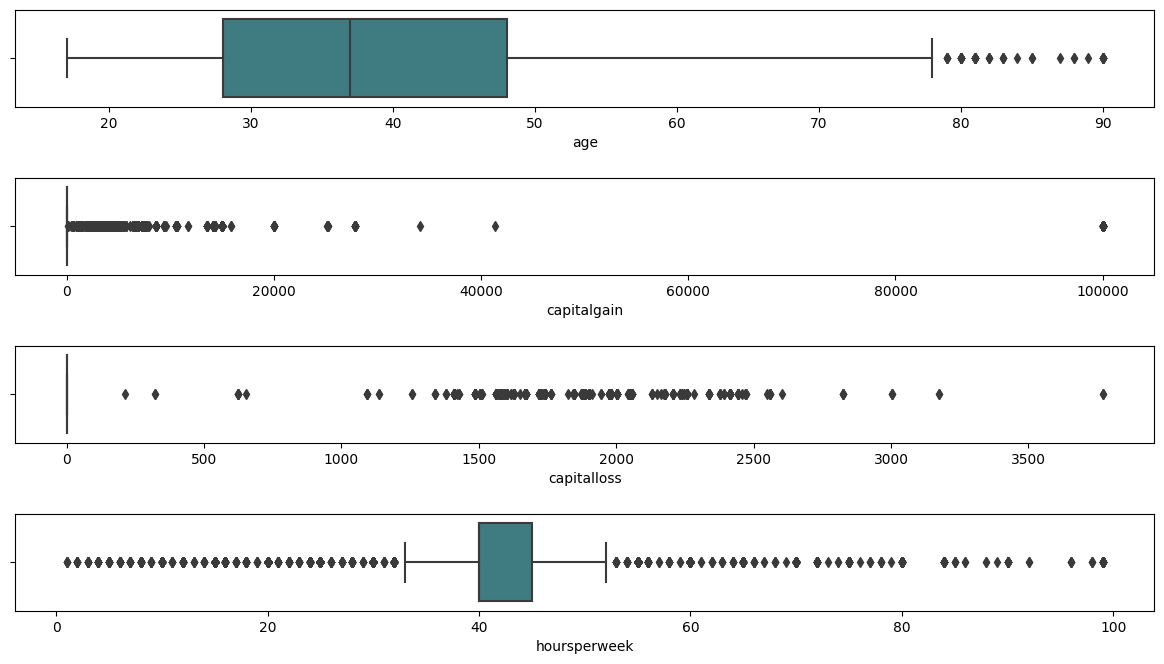

In [ ]:
outlier2 = test_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Section 4. Data Preprocessing

In [ ]:
train_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
# TODO: Create a LabelEncoder object
LaEn = LabelEncoder()
# TODO: Use the LabelEncoder object to transform these columns of the train_data dataframe:
listofcol = ["workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "native"]
for col in listofcol:
  list_value = pd.unique(train_data_copy[col])
  LaEn.fit(list_value)
  train_data_copy[col] = LaEn.transform(train_data_copy[col])
# workclass, education, maritalstatus, occupation, relationship, race, sex, native
# TODO: Display the modified train_data dataframe
train_data_copy.head(3)
# TODO: Use a list comprehension to replace the values in the 'Salary' column of
# the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'
salary_list = train_data_copy["Salary"].values.tolist()
newlist = [0 if x.strip() == "<=50K" else 1 for x in salary_list]
# print(salary_list)
# print(newlist)
train_data_copy = train_data_copy.drop(["Salary"], axis=1)
train_data_copy['Salary'] = newlist
train_data_copy.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0


In [ ]:
# TODO: Do the same preprocessing to test data
LaEn = LabelEncoder()

listofcol = ["workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "native"]
for col in listofcol:
  list_value = pd.unique(test_data_copy[col])
  LaEn.fit(list_value)
  test_data_copy[col] = LaEn.transform(test_data_copy[col])
# workclass, education, maritalstatus, occupation, relationship, race, sex, native
# TODO: Display the modified train_data dataframe
test_data_copy.head(3)
# TODO: Use a list comprehension to replace the values in the 'Salary' column of
# the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'
salary_list = test_data_copy["Salary"].values.tolist()
newlist = [0 if x.strip() == "<=50K" else 1 for x in salary_list]
# print(salary_list)
# print(newlist)
test_data_copy = test_data_copy.drop(["Salary"], axis=1)
test_data_copy['Salary'] = newlist
test_data_copy.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1


## Section 5. Model Building

In [ ]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train = train_data_copy.drop('Salary', axis=1)
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = train_data_copy['Salary']
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data_copy.drop('Salary', axis=1)
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data_copy['Salary']
# TODO: Print the shape of X_train, y_train, X_test, and y_test dataframes
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)
# TODO: Create a Support Vector Classifier object
svc = SVC()

X_train: (30161, 13)
y_train: (30161,)
X_test: (15060, 13)
y_test: (15060,)


In [ ]:
for col in train_data_copy.columns:
  train_data_copy[col] = train_data_copy[col].astype(int)
  print(type(train_data_copy[col][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


## Section 6. Model Training | Testing | Evaluation - SVM Model

In [ ]:
train_data_copy.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
# TODO: Train the svc model with X_train and y_train
svc.fit(X_train, y_train)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
print(confusion_matrix(y_test, y_pred))
# TODO: Print the classification report of y_test and y_pred
classification_report(y_test, y_pred)
# TODO: Print the training accuracy of the svc model with X_train and y_train
training_accuracy = svc.score(X_train, y_train)
print("Training accuracy:", training_accuracy)
# TODO: Print the testing accuracy of the svc model with X_test and y_test
testing_accuracy = svc.score(X_test, y_test)
print("Test accuracy:", testing_accuracy)

[[10997   363]
 [ 2703   997]]
Training accuracy: 0.7960279831570571
Test accuracy: 0.7964143426294821


##Section 7. Handling Imbalance Data

In [ ]:
# TODO: Print the count of each unique value in the 'Salary' column of the train_data dataframe
zeros = 0
ones = 0
for x in train_data_copy['Salary']:
  if x == 1:
    ones = ones + 1
  else:
    zeros = zeros + 1
print("Zeros: ",zeros)
print("Ones: ",ones)
# TODO: Create a SMOTE object

# TODO: Use  the SMOTE object to resample the X_train and y_train dataframes
# and store the result in X_resampled and y_resampled, respectively

# TODO: Display the resampled X_resampled dataframe

# TODO: Display the resampled y_resampled dataframe

# TODO: Print the count of each unique value in the resampled y_resampled dataframe


Zeros:  22653
Ones:  7508


* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [ ]:
# TODO: Create a Support Vector Classifier object,
# try to change it's parameters for better accuracy

# TODO: Train the model with resampled X and y dataframes as arguments

# TODO: Use the model to predict the values of y for X_test and store the result in y_pred

# TODO: Print the confusion matrix of y_test and y_pred

# TODO: Print the classification report of y_test and y_pred

# TODO: Print the training accuracy of the model with resampled X and y dataframes as arguments

# TODO: Print the testing accuracy of the model with X_test and y_test as arguments


## Section 8. Feature Selection

In [ ]:
def select_features(X_train, y_train, X_test):

    # TODO: Create a SelectKBest object with chi2 as the score function

    # TODO: Fit the X_train and y_train dataframes using the SelectKBest object

    # TODO: Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs

    # TODO: Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs

    # TODO: Return the X_train_fs, X_test_fs, and SelectKBest object


In [ ]:
# TODO: Call the select_features() function and store the result in X_fs, X_test_fs, and fs

# TODO: print the corresponding score of each feature using scores_ attribute of the fs object

# TODO: Create a bar plot of the scores

# TODO: Display the bar plot

# TODO Pick out the most relevant features

In [ ]:
# TODO: Create a copy of the train_data dataframe called train_data_copy

# TODO: Drop the columns with irrelevant features from the train_data_copy dataframe

# TODO: Display the train_data_copy dataframe

# TODO: Do the same to the test_data

## Section 9. Model Training with Highly Relevant Features


In [ ]:
# TODO: Repeat all the steps in Section 6 with the new dataset that has irrelevant features removed